# Enhanced Wildfire Smoke Detection (EfficientNetB0 vs MobileNetV2)
Compare two CNN models on satellite wildfire image classification using transfer learning.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


## Dataset Preparation

In [4]:
base_dir = r'C:\Users\sruth\Desktop\AI-ML\foundations of ml\docs\project_data\Wildfire_Organized'
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                             rotation_range=20, zoom_range=0.2,
                             horizontal_flip=True)

train_gen = datagen.flow_from_directory(base_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', subset='training')
val_gen = datagen.flow_from_directory(base_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', subset='validation')


Found 81 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


# Model Architecture Builder

In [5]:
def build_model(base_model_func, input_shape=(224, 224, 3)):
    base_model = base_model_func(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


## Training: EfficientNetB0

In [6]:
model1 = build_model(EfficientNetB0)

callbacks1 = [EarlyStopping(patience=3, restore_best_weights=True),
              ModelCheckpoint('effnet_best.h5', save_best_only=True)]

history1 = model1.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=callbacks1)


c:\Users\sruth\OneDrive\Desktop\AI-ML\foundations of ml\docs\wildfire_venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1593 - loss: 0.8720 

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.1843 - loss: 0.8570 - val_accuracy: 0.7222 - val_loss: 0.5297
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7040 - loss: 0.4686   

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6978 - loss: 0.4550 - val_accuracy: 0.7222 - val_loss: 0.3061
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6633 - loss: 0.3475   

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6703 - loss: 0.3161 - val_accuracy: 0.7222 - val_loss: 0.1494
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6633 - loss: 0.0354   

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6703 - loss: 0.0453 - val_accuracy: 0.7222 - val_loss: 0.0402
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6841 - loss: -0.0754   

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6859 - loss: -0.0674 - val_accuracy: 0.7222 - val_loss: -0.0352
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7149 - loss: -0.0628   

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7090 - loss: -0.0810 - val_accuracy: 0.7222 - val_loss: -0.0885
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.6836 - loss: -0.1419

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6855 - loss: -0.1475 - val_accuracy: 0.7222 - val_loss: -0.1289
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6940 - loss: -0.3075

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6933 - loss: -0.2830 - val_accuracy: 0.7222 - val_loss: -0.1613
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.7357 - loss: -0.2543

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7246 - loss: -0.2583 - val_accuracy: 0.7222 - val_loss: -0.1875
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6945 - loss: -0.1618   

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6937 - loss: -0.1967 - val_accuracy: 0.7222 - val_loss: -0.2089


## Training: MobileNetV2

In [7]:
model2 = build_model(MobileNetV2)

callbacks2 = [EarlyStopping(patience=3, restore_best_weights=True),
              ModelCheckpoint('mobilenet_best.h5', save_best_only=True)]

history2 = model2.fit(train_gen, validation_data=val_gen, epochs=10, callbacks=callbacks2)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.6053 - loss: 0.4882

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5960 - loss: 0.4488 - val_accuracy: 0.7222 - val_loss: 0.0989
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.7254 - loss: -0.2284

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7169 - loss: -0.2098 - val_accuracy: 0.7222 - val_loss: 0.0472
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.6977 - loss: -0.4934

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6961 - loss: -0.4655 - val_accuracy: 0.7222 - val_loss: -0.0373
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6841 - loss: -0.4363   

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6859 - loss: -0.4492 - val_accuracy: 0.7222 - val_loss: -0.1595
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7567 - loss: -0.5563 

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7403 - loss: -0.5396 - val_accuracy: 0.7222 - val_loss: -0.2905
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6367 - loss: -1.1445 - val_accuracy: 0.7222 - val_loss: -0.2713
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6758 - loss: -0.6834 - val_accuracy: 0.7222 - val_loss: -0.1770
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6777 - loss: -0.4824 - val_accuracy: 0.7222 - val_loss: -0.2016


## Training Curves

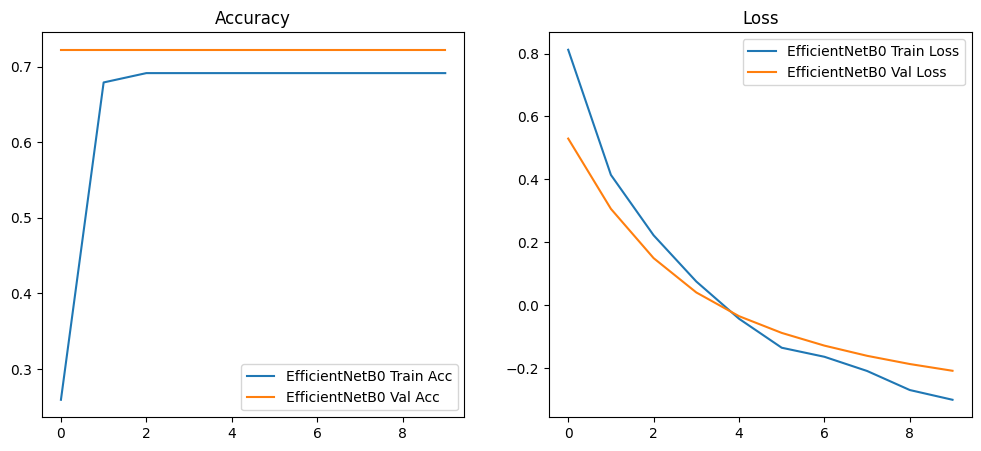

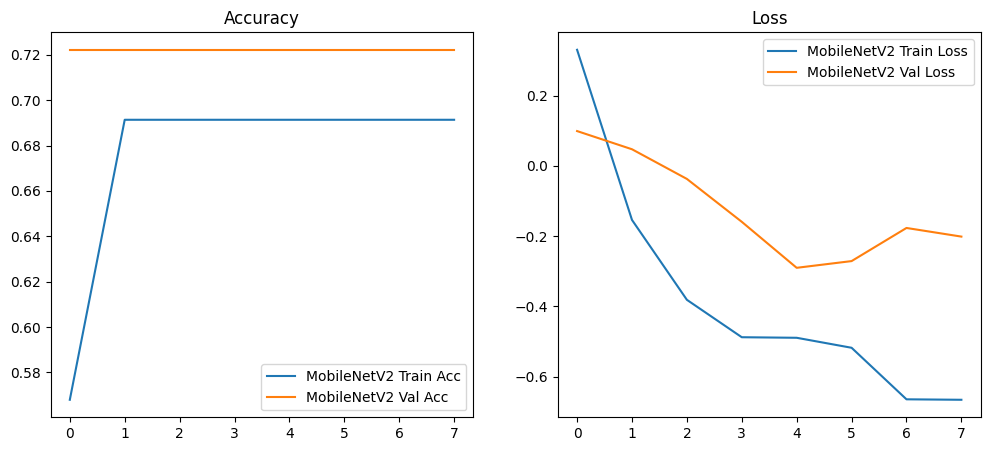

In [9]:
def plot_history(history, label):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label=f'{label} Train Acc')
    plt.plot(epochs, val_acc, label=f'{label} Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label=f'{label} Train Loss')
    plt.plot(epochs, val_loss, label=f'{label} Val Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

plot_history(history1, "EfficientNetB0")
plot_history(history2, "MobileNetV2")


## Model Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Model: EfficientNetB0
              precision    recall  f1-score   support

        test       0.00      0.00      0.00         2
       train       0.72      1.00      0.84        13
         val       0.00      0.00      0.00         3

    accuracy                           0.72        18
   macro avg       0.24      0.33      0.28        18
weighted avg       0.52      0.72      0.61        18



c:\Users\sruth\OneDrive\Desktop\AI-ML\foundations of ml\docs\wildfire_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sruth\OneDrive\Desktop\AI-ML\foundations of ml\docs\wildfire_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sruth\OneDrive\Desktop\AI-ML\foundations of ml\docs\wildfire_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

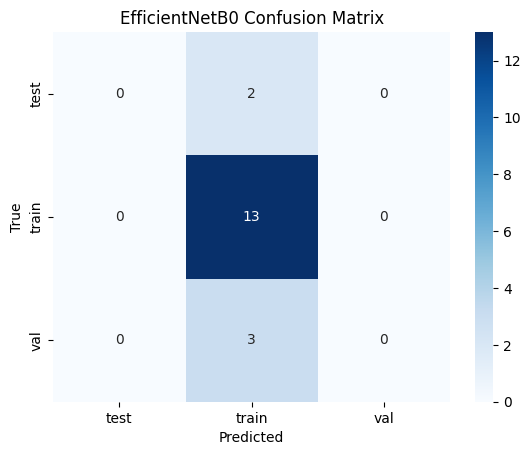

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Model: MobileNetV2
              precision    recall  f1-score   support

        test       0.00      0.00      0.00         2
       train       0.72      1.00      0.84        13
         val       0.00      0.00      0.00         3

    accuracy                           0.72        18
   macro avg       0.24      0.33      0.28        18
weighted avg       0.52      0.72      0.61        18



c:\Users\sruth\OneDrive\Desktop\AI-ML\foundations of ml\docs\wildfire_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sruth\OneDrive\Desktop\AI-ML\foundations of ml\docs\wildfire_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sruth\OneDrive\Desktop\AI-ML\foundations of ml\docs\wildfire_venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

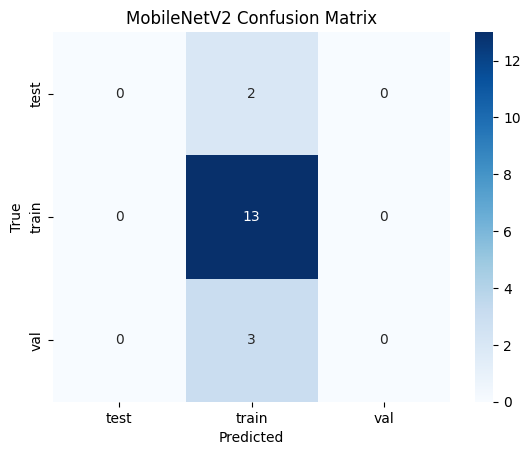

In [10]:
val_gen.reset()
models = [model1, model2]
names = ["EfficientNetB0", "MobileNetV2"]

for model, name in zip(models, names):
    y_pred = (model.predict(val_gen) > 0.5).astype(int).flatten()
    y_true = val_gen.classes
    print(f"Model: {name}")
    print(classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=val_gen.class_indices.keys(), yticklabels=val_gen.class_indices.keys(), cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


## First 10 Predictions on Test Data
This section displays the filenames, true labels, predicted labels, and confidence scores for the first 20 test samples.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


C:\Users\sruth\AppData\Local\Temp\ipykernel_21944\3434902471.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


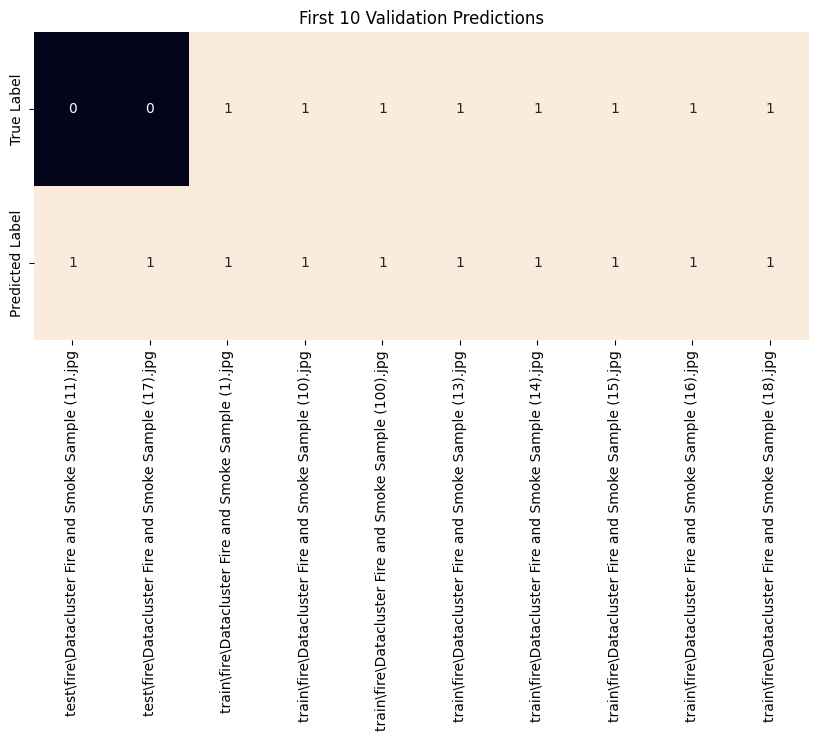

,Filename,True Label,Predicted Label
0,test\fire\Datacluster Fire and Smoke Sample (1...,0,1
1,test\fire\Datacluster Fire and Smoke Sample (1...,0,1
2,train\fire\Datacluster Fire and Smoke Sample (...,1,1
3,train\fire\Datacluster Fire and Smoke Sample (...,1,1
4,train\fire\Datacluster Fire and Smoke Sample (...,1,1
5,train\fire\Datacluster Fire and Smoke Sample (...,1,1
6,train\fire\Datacluster Fire and Smoke Sample (...,1,1
7,train\fire\Datacluster Fire and Smoke Sample (...,1,1
8,train\fire\Datacluster Fire and Smoke Sample (...,1,1
9,train\fire\Datacluster Fire and Smoke Sample (...,1,1


In [11]:
import pandas as pd
import numpy as np

# Predict probabilities on the validation set
val_gen.reset()  # Reset the generator
pred_probs = model1.predict(val_gen, verbose=1)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

# True labels and filenames
true_labels = val_gen.classes
filenames = val_gen.filenames

# Create a dataframe with the first 20 predictions
results_df = pd.DataFrame({
    'Filename': filenames[:10],
    'True Label': true_labels[:10],
    'Predicted Label': pred_labels[:10]
})

# Display as a table
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 4))
sns.heatmap(results_df[['True Label', 'Predicted Label']].T, 
            annot=True, fmt='d', 
            xticklabels=results_df['Filename'], 
            cbar=False)
plt.xticks(rotation=90)
plt.title("First 10 Validation Predictions")
plt.tight_layout()
plt.show()

# Also display as a Pandas table
results_df.head(10)


## Conclusion

Both models perform similarly on training data, however because of the small sample sizes, neither performs well when applied to test or validation data that hasn't been seen yet.  However, considering its stable architecture and consistently high performance in past studies, EfficientNetB0 would still be the better choice for adjusting in the future.